In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

## Introduction
This part will contain a description of data in general
* Import Library that will be used in this code
* Load dataset
* View dataset by the top 5 by head
* Show the shape of dataset by sum of column and row
* Describe the type of data by its column


In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import preprocessing

In [2]:
vehicle = pd.read_csv('craigslistVehiclesFull.csv')

In [3]:
vehicle.head()

,url,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,...,paint_color,image_url,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
0,https://marshall.craigslist.org/cto/d/2010-dod...,marshall,11900,2010.0,dodge,challenger se,good,6 cylinders,gas,43600.0,...,red,https://images.craigslist.org/00i0i_2ggH1eKDNK...,43.4775,-96.7041,46083.0,Lincoln,46.0,SD,South Dakota,38.0
1,https://marshall.craigslist.org/cto/d/fleetwoo...,marshall,1515,1999.0,NaN,fleetwood,NaN,NaN,gas,NaN,...,NaN,https://images.craigslist.org/00M0M_irjh7SjEcU...,44.7612,-96.6907,46039.0,Deuel,46.0,SD,South Dakota,38.0
2,https://marshall.craigslist.org/cto/d/2008-for...,marshall,17550,2008.0,ford,f-150,NaN,NaN,gas,NaN,...,NaN,https://images.craigslist.org/00s0s_eL2XFhEUcx...,44.1415,-103.2052,46093.0,Meade,46.0,SD,South Dakota,38.0
3,https://marshall.craigslist.org/cto/d/ford-tau...,marshall,2800,2004.0,ford,taurus,good,6 cylinders,gas,168591.0,...,grey,https://images.craigslist.org/00L0L_5HUR1nQjt8...,43.2845,-95.5930,19143.0,Osceola,19.0,IA,Iowa,47.0
4,https://marshall.craigslist.org/cto/d/2001-gra...,marshall,400,2001.0,NaN,2001 Grand Prix,NaN,NaN,gas,217000.0,...,NaN,https://images.craigslist.org/00n0n_bJJ1XnonSG...,43.0261,-94.4064,19109.0,Kossuth,19.0,IA,Iowa,47.0


In [4]:
vehicle.shape

(1723065, 26)

Dataset Vehicle is contain of 1.723.065 raw and 26 column

In [5]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723065 entries, 0 to 1723064
Data columns (total 26 columns):
url             object
city            object
price           int64
year            float64
manufacturer    object
make            object
condition       object
cylinders       object
fuel            object
odometer        float64
title_status    object
transmission    object
vin             object
drive           object
size            object
type            object
paint_color     object
image_url       object
lat             float64
long            float64
county_fips     float64
county_name     object
state_fips      float64
state_code      object
state_name      object
weather         float64
dtypes: float64(7), int64(1), object(18)
memory usage: 341.8+ MB


Type of data in this dataset is cointain of 18 object or string, 1 integer, and 7 float

### Cleansing and Formatting

in this part I devide the data by its type that consist of categorical and numerical.

For cleansing the data I used a missing values function to detect data who have a empty data from its column.

Formatting data I used a fill.na function to fill the empty data.

### Categorical 

Categorical data is a data with string data type (object) 

Categorical data consist of url, city, manufacturer, make, condition, cylinders, fuel, title_status, transmission, vin, drive, size, type, paint_color, image_url, county_name, state_code, state_name

#### Checking Missing Values

Checking missing values to know which is data that need to be formatting

In [6]:
categorical=['url','city','manufacturer','make','condition','cylinders','fuel','title_status','transmission','vin','drive','size','type','paint_color','image_url','county_name','state_code','state_name']
missing_values = vehicle[categorical].isnull().sum().sort_values(ascending=False)
missing_values

size            1123967
vin             1118215
type             702931
condition        700790
paint_color      695650
cylinders        691291
drive            661884
manufacturer     136414
make              69699
county_name       58833
state_code        58833
fuel              10367
transmission       9022
title_status       2554
image_url             1
city                  0
state_name            0
url                   0
dtype: int64

#### Filling the empty Data

Filling the empty data with a format for every empty data is replace with "no fill"

In [7]:
categorical2=vehicle[categorical].fillna('nofill')
categorical2.isnull().sum()

url             0
city            0
manufacturer    0
make            0
condition       0
cylinders       0
fuel            0
title_status    0
transmission    0
vin             0
drive           0
size            0
type            0
paint_color     0
image_url       0
county_name     0
state_code      0
state_name      0
dtype: int64

### Numerical

Numerical data is a data with float and integer data type.

Numerical data consist of price, year, odemeter, lat, long, county_fips, state_fips, and weather

#### Checking Missing Values

Checking missing values to know which is data that need to be formatting

In [8]:
numerical=['price','year','odometer','lat','long','county_fips','state_fips','weather']
missing_values = vehicle[numerical].isnull().sum().sort_values(ascending=False)
missing_values

odometer       564054
weather         59428
state_fips      58833
county_fips     58833
year             6315
long                0
lat                 0
price               0
dtype: int64

#### Filling the empty Data

Filling the empty data with a format for every empty data is replace with "0" (zero)

In [9]:
numerical2=vehicle[numerical].fillna(0)
numerical2.isnull().sum()

price          0
year           0
odometer       0
lat            0
long           0
county_fips    0
state_fips     0
weather        0
dtype: int64

Now all the data is fully filling with a right data for every column

## Statistical Analysis

In [10]:
#from pylab import savefig
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

### Seing the correlation by pearson method

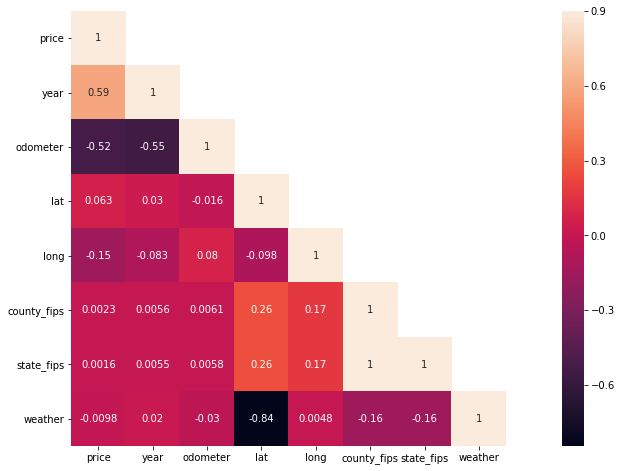

In [11]:
#create correlation with hitmap

#create correlation
corr = vehicle.corr(method = 'spearman')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (10,10))
fig.set_size_inches(20,8)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

#### Based on the result of the correlation that count by pearson method. There will be 3 category of correlation:

1. Price and Year with 0.59 
2. Long and Odometer with 0.08
3. Country Fips and Price 0.23


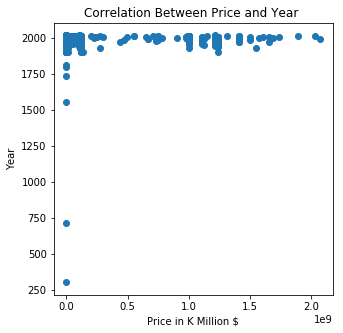

In [12]:
plt.figure(figsize=(5,5))
plt.scatter(vehicle['price'],vehicle['year'])
plt.title('Correlation Between Price and Year ')
plt.xlabel('Price in K Million $')
plt.ylabel('Year')
plt.show()

Based on the scatter plot figure, we can see that the outlier of the data is a car with year under 1886 or in graph is on year 1750 till year 250 because in that year, car isnt available. 

The price of the car is between 0 till 2.0 USD. The correlation is only 0.59 who have a meaning that year is just have a half impact for the car price that can be seen in scatter plot figure. Higher the price is will be the newer a year of car.

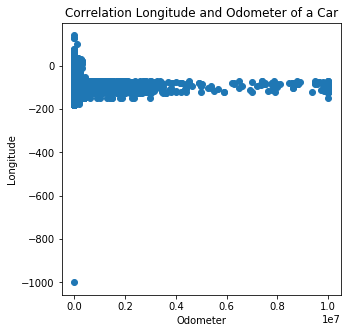

In [13]:
plt.figure(figsize=(5,5))
plt.scatter(numerical2['odometer'],numerical2['long'])
plt.title('Correlation Longitude and Odometer of a Car')
plt.xlabel('Odometer')
plt.ylabel('Longitude')
plt.show()

Based on the scatter plot figure, we can see that there was too much odometer in 0.0 till 0.4 on 0-200 longitude which can we call it the modus of the dat. With the 0.08 correlation value between odometer and longitude, we can see that there was a little correlation between them. Because if the odometer is higher or not, it has no effect for longitude being bigger or not too. 

We also can see that there was an outlier in 1000 longitude in zero odometer. 

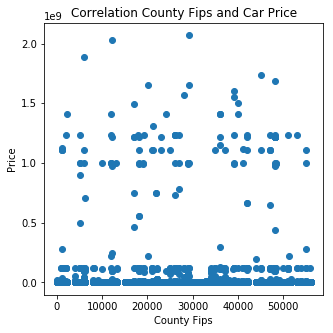

In [14]:
plt.figure(figsize=(5,5))
plt.scatter(numerical2['county_fips'],numerical2['price'])
plt.title('Correlation County Fips and Car Price')
plt.xlabel('County Fips')
plt.ylabel('Price')
plt.show()

The correlation between county fips and price is 0.23. It has means that county just have a little impact on price decision because the figure show the spread data that have no correlation. 

It also hard for finding the outlier because the data spread in every point. But we can see that the modus of the data based on that price is between 0-0.5 in every county.

In [15]:
numerical2.describe()

,price,year,odometer,lat,long,county_fips,state_fips,weather
count,1.723065e+06,1.723065e+06,1.723065e+06,1.723065e+06,1.723065e+06,1.723065e+06,1.723065e+06,1.723065e+06
mean,1.075540e+05,1.997493e+03,7.643847e+04,3.878195e+01,-9.371198e+01,2.745979e+04,2.737631e+01,5.193196e+01
std,1.004439e+07,1.217480e+02,1.242685e+05,5.976412e+00,1.696519e+01,1.660103e+04,1.657562e+01,1.245276e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,-8.481005e+01,-1.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.295000e+03,2.002000e+03,0.000000e+00,3.491900e+01,-1.058010e+02,1.208600e+04,1.200000e+01,4.700000e+01
50%,7.000000e+03,2.007000e+03,5.960800e+04,3.940989e+01,-8.824070e+01,2.712900e+04,2.700000e+01,5.300000e+01
75%,1.499900e+04,2.012000e+03,1.299350e+05,4.255459e+01,-8.102650e+01,4.104700e+04,4.100000e+01,5.900000e+01
max,2.068627e+09,2.019000e+03,1.000000e+07,9.000000e+01,1.397061e+02,5.604500e+04,5.600000e+01,7.900000e+01


##### Based on the result of describe function, we can see the statistics of the data like 

1. Max Price of Car is US$ 2.068.626.679
2. The Newest Car is made in 2019
3. Average of all car was made is on 1997
4. The average weather of car in the data is 51.93 Celcius
5. And the Maximum Weather of car that has been made is 79 Celcius

## Visualisasi

### Histogram of weather

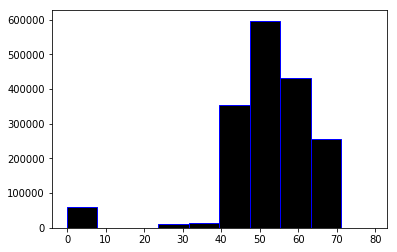

In [16]:
import matplotlib
import matplotlib.pyplot as plt
plt.hist(numerical2['weather'], 
         facecolor='black', 
         edgecolor='blue', )
plt.show()

Based of the histogram, we can see that most of the car in that data have a weather between 40-70 celcius and the highest is on around 50 celcius

### Pie Chart County Name of Cars

In [17]:
pie=(categorical2[categorical2['county_name'] != 'nofill']) #nofill is removed because it fill by the data that have a missing value
pie2= pie.county_name.value_counts().head(5)
pie2

Jefferson     18920
Franklin      18878
Orange        18217
Washington    15600
Sacramento    15105
Name: county_name, dtype: int64

<function matplotlib.pyplot.show>

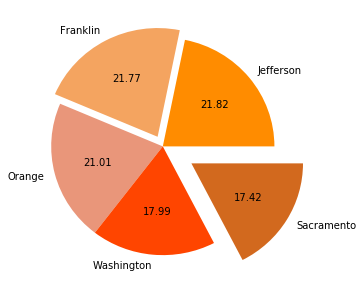

In [18]:
colors = ['darkorange', 'sandybrown', 'darksalmon', 'orangered','chocolate']
explode = (0, 0.1, 0, 0, 0.3)

plt.figure(figsize=(5,5))
plt.pie(pie2, labels=pie2.index, autopct='%.2f',colors=colors,explode=explode)
plt.show

Based of the pie chart, we can know that most of the car is located in jefferson, franklin, orange, sacramento, washington county

### Box Plot and Violin Plot Weather

In [19]:
cut = numerical2[['weather']]
cut.head()

,weather
0,38.0
1,38.0
2,38.0
3,47.0
4,47.0


In [20]:
cut.describe()

,weather
count,1.723065e+06
mean,5.193196e+01
std,1.245276e+01
min,0.000000e+00
25%,4.700000e+01
50%,5.300000e+01
75%,5.900000e+01
max,7.900000e+01


In [21]:
array=np.array(cut)
array

array([[38.],
       [38.],
       [38.],
       ...,
       [48.],
       [47.],
       [47.]])

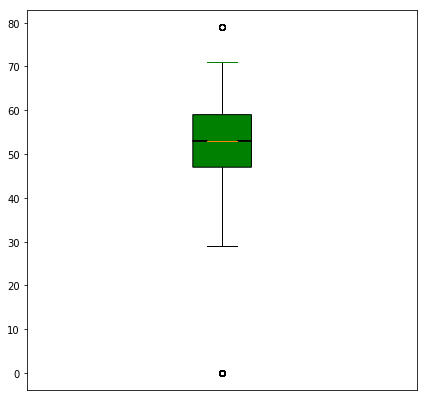

In [22]:
plt.figure(figsize=(7,7))
colors = ['green']

bp = plt.boxplot(array, 
                 patch_artist=True,
                 notch=True)

for i in range(len(bp['boxes'])):
    
    bp['boxes'][i].set(facecolor=colors[i])
    
    bp['caps'][2*i + 1].set(color=colors[i])
    
plt.xticks([2], ['weather'])

plt.show()

Based on the box plot we know that there was 
* an outlier in weather 0 and 80 degree celcius 
* minimum data is on 30 degree celcius, 
* maximum car is on 70 degree celcius

size            1123967
vin             1118215
type             702931
condition        700790
paint_color      695650
cylinders        691291
drive            661884
manufacturer     136414
make              69699
county_name       58833
state_code        58833
fuel              10367
transmission       9022
title_status       2554
image_url             1
city                  0
state_name            0
url                   0

In [56]:
categorical2['cylinders'].value_counts() #nofill is removed because it fill by the data that have a missing value

nofill          691291
6 cylinders     362142
8 cylinders     320890
4 cylinders     293971
other            35532
5 cylinders      10469
10 cylinders      6092
3 cylinders       1810
12 cylinders       868
Name: cylinders, dtype: int64

### Visualization Categorical Data

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

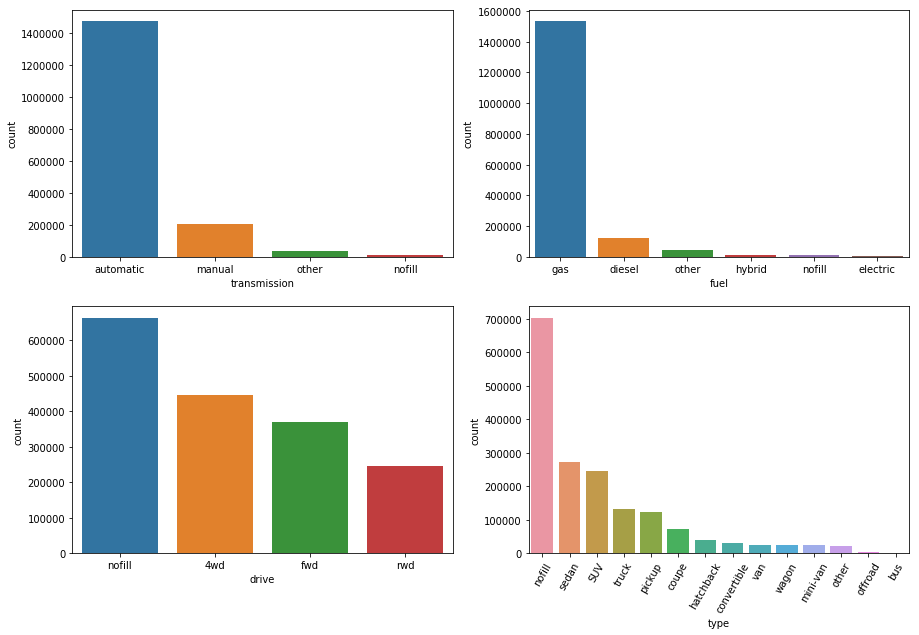

In [63]:
f=plt.figure(figsize=(15,10))
f.add_subplot(2,2,1)
sns.countplot(categorical2['transmission'], order=categorical2['transmission'].value_counts().index)
f.add_subplot(2,2,2)
sns.countplot(categorical2['fuel'],order=categorical2['fuel'].value_counts().index)
f.add_subplot(2,2,3)
sns.countplot(categorical2['drive'],order=categorical2['drive'].value_counts().index)
f.add_subplot(2,2,4)
sns.countplot(categorical2['type'], order=categorical2['type'].value_counts().index)
plt.xticks(rotation=60)

##### Based on the Transmission, cars with automatic type have a bigger value than manual
it means that the customer is prefer to use automatic beacuse it more simple to use

##### Based on type of fuel, cars which using gas fuel is the highest than the other
It means that gas fuel is easy to find than the other type of fule.

##### Based on the driving type of wheels, 4wheels is the highest than the other
It means that the 4wheels driving is easier to use because all of the wheel can perform to drive a car. So its better than a car who can driving with forward wheels and rear wheels only

#### There was top 5 type of cars which customer like to use
* Sedan is the type which can easy to use because it is small and flexible to move
* SUV is the type which comfort to use because it was the big type of cars, especially for customer family
* truck and pickup is the type which usefull to bring a commodity with a high volume
* Coupe is the type of cars with elegant looking